In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Chapter 02

## Load data and visualization

In [2]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

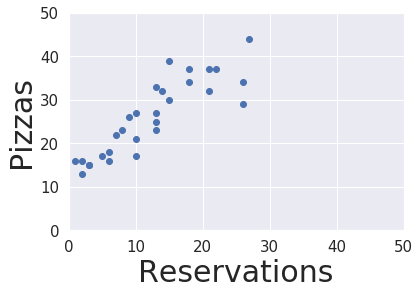

In [3]:
sns.set()                                                # activate Seaborn
plt.axis([0, 50, 0, 50])                                 # scale axes (0 to 50)
plt.xticks(fontsize=15)                                  # set x axis ticks
plt.yticks(fontsize=15)                                  # set y axis ticks
plt.xlabel("Reservations", fontsize=30)                  # set x axis label
plt.ylabel("Pizzas", fontsize=30)                        # set y axis label
plt.plot(X, Y, "bo")                                     # plot data
plt.show()                                               # display chart

## Linear regression (wihtout bias)

In [4]:
def predict(X, w):
    return X * w

In [5]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

In [6]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))
        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w
    raise Exception("Couldn't converge within %d iterations" % iterations)


### Training the system

In [7]:
w = train(X, Y, iterations=10000, lr=0.01)

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo


w=1.840


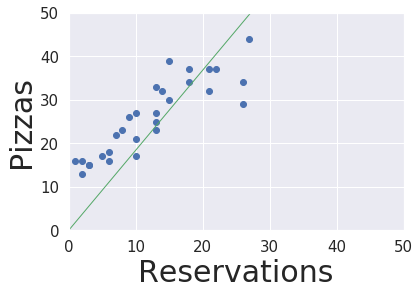

In [8]:
print("\nw=%.3f" % w)

sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.show()

### Prediction

In [9]:
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Prediction: x=20 => y=36.80


## Linear regression with bias

In [10]:
def predict(X, w, b):
    return X * w + b

In [11]:
def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


In [12]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)

### Train the system

In [13]:
w, b = train(X, Y, iterations=10000, lr=0.01)

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

Iteration  920 => Loss: 33.136747
Iteration  921 => Loss: 33.103513
Iteration  922 => Loss: 33.070480
Iteration  923 => Loss: 33.037647
Iteration  924 => Loss: 33.005013
Iteration  925 => Loss: 32.972580
Iteration  926 => Loss: 32.940347
Iteration  927 => Loss: 32.908313
Iteration  928 => Loss: 32.876480
Iteration  929 => Loss: 32.844847
Iteration  930 => Loss: 32.813413
Iteration  931 => Loss: 32.813320
Iteration  932 => Loss: 32.779553
Iteration  933 => Loss: 32.745987
Iteration  934 => Loss: 32.712620
Iteration  935 => Loss: 32.679453
Iteration  936 => Loss: 32.646487
Iteration  937 => Loss: 32.613720
Iteration  938 => Loss: 32.581153
Iteration  939 => Loss: 32.548787
Iteration  940 => Loss: 32.516620
Iteration  941 => Loss: 32.484653
Iteration  942 => Loss: 32.452887
Iteration  943 => Loss: 32.421320
Iteration  944 => Loss: 32.389953
Iteration  945 => Loss: 32.358787
Iteration  946 => Loss: 32.327820
Iteration  947 => Loss: 32.297053
Iteration  948 => Loss: 32.266487
Iteration  949

Iteration 1519 => Loss: 22.926280
Iteration 1520 => Loss: 22.922647
Iteration 1521 => Loss: 22.919213
Iteration 1522 => Loss: 22.915980
Iteration 1523 => Loss: 22.912947
Iteration 1524 => Loss: 22.910113
Iteration 1525 => Loss: 22.907480
Iteration 1526 => Loss: 22.905047
Iteration 1527 => Loss: 22.902813
Iteration 1528 => Loss: 22.900780
Iteration 1529 => Loss: 22.898947
Iteration 1530 => Loss: 22.897313
Iteration 1531 => Loss: 22.895880
Iteration 1532 => Loss: 22.894647
Iteration 1533 => Loss: 22.893613
Iteration 1534 => Loss: 22.893600
Iteration 1535 => Loss: 22.890233
Iteration 1536 => Loss: 22.887067
Iteration 1537 => Loss: 22.884100
Iteration 1538 => Loss: 22.881333
Iteration 1539 => Loss: 22.878767
Iteration 1540 => Loss: 22.876400
Iteration 1541 => Loss: 22.874233
Iteration 1542 => Loss: 22.872267
Iteration 1543 => Loss: 22.870500
Iteration 1544 => Loss: 22.868933
Iteration 1545 => Loss: 22.867567
Iteration 1546 => Loss: 22.866400
Iteration 1547 => Loss: 22.865433
Iteration 1548

In [14]:
print("\nw=%.3f, b=%.3f" % (w, b))


w=1.100, b=12.930


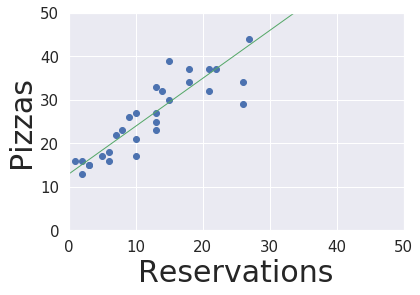

In [15]:
sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.show()

In [16]:
prediction = 50

In [17]:
print("Prediction: x=%d => y=%.2f" % (prediction, predict(prediction, w, b)))

Prediction: x=50 => y=67.93


# Chapter 03

## How b varies with w

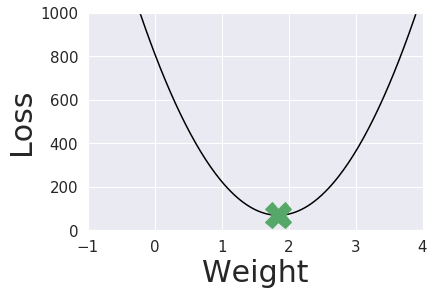

In [18]:
# Compute losses for w ranging from -1 to 4
weights = np.linspace(-1.0, 4.0, 200)
losses = [loss(X, Y, w, 0) for w in weights]

# Plot weights and losses
plt.axis([-1, 4, 0, 1000])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Weight", fontsize=30)
plt.ylabel("Loss", fontsize=30)
plt.plot(weights, losses, color="black")

# Put a green cross on the minimum loss
min_index = np.argmin(losses)
plt.plot(weights[min_index], losses[min_index], "gX", markersize=26)

plt.show()

## Descent Gradient (unbiased)

In [19]:
def gradient(X, Y, w):
    return 2 * np.average(X * (predict(X, w, 0) - Y))

In [20]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, 0)))
        w -= gradient(X, Y, w) * lr
    return w

### Training

In [21]:
w = train(X, Y, iterations=100, lr=0.001)

Iteration    0 => Loss: 812.8666666667
Iteration    1 => Loss: 304.3630879787
Iteration    2 => Loss: 143.5265791020
Iteration    3 => Loss: 92.6549949641
Iteration    4 => Loss: 76.5646303400
Iteration    5 => Loss: 71.4753484132
Iteration    6 => Loss: 69.8656402969
Iteration    7 => Loss: 69.3564996643
Iteration    8 => Loss: 69.1954616593
Iteration    9 => Loss: 69.1445263431
Iteration   10 => Loss: 69.1284158205
Iteration   11 => Loss: 69.1233201627
Iteration   12 => Loss: 69.1217084379
Iteration   13 => Loss: 69.1211986595
Iteration   14 => Loss: 69.1210374197
Iteration   15 => Loss: 69.1209864206
Iteration   16 => Loss: 69.1209702899
Iteration   17 => Loss: 69.1209651878
Iteration   18 => Loss: 69.1209635741
Iteration   19 => Loss: 69.1209630637
Iteration   20 => Loss: 69.1209629022
Iteration   21 => Loss: 69.1209628512
Iteration   22 => Loss: 69.1209628350
Iteration   23 => Loss: 69.1209628299
Iteration   24 => Loss: 69.1209628283
Iteration   25 => Loss: 69.1209628278
Iteration

In [22]:
print("\nw=%.10f" % w)


w=1.8436928702


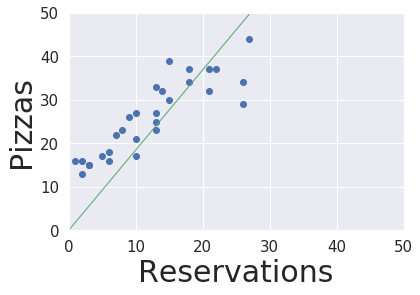

In [23]:
b = 0
sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.show()

## Descent Gradient

In [24]:
def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient = 2 * np.average(X * (predict(X, w, w) - Y))
    return (w_gradient, b_gradient)

In [25]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w,b

### Training

In [26]:
w, b = train(X, Y, iterations=20000, lr=0.001)

Iteration    0 => Loss: 812.8666666667
Iteration    1 => Loss: 278.1520922987
Iteration    2 => Loss: 122.6957284362
Iteration    3 => Loss: 77.1989850878
Iteration    4 => Loss: 63.7231230686
Iteration    5 => Loss: 59.6466849386
Iteration    6 => Loss: 58.3691261216
Iteration    7 => Loss: 57.9459805357
Iteration    8 => Loss: 57.7945797571
Iteration    9 => Loss: 57.7351475723
Iteration   10 => Loss: 57.7095396438
Iteration   11 => Loss: 57.6976068614
Iteration   12 => Loss: 57.6917232340
Iteration   13 => Loss: 57.6887147859
Iteration   14 => Loss: 57.6871427337
Iteration   15 => Loss: 57.6863110374
Iteration   16 => Loss: 57.6858679955
Iteration   17 => Loss: 57.6856311008
Iteration   18 => Loss: 57.6855041750
Iteration   19 => Loss: 57.6854360945
Iteration   20 => Loss: 57.6853995560
Iteration   21 => Loss: 57.6853799396
Iteration   22 => Loss: 57.6853694064
Iteration   23 => Loss: 57.6853637499
Iteration   24 => Loss: 57.6853607122
Iteration   25 => Loss: 57.6853590808
Iteration

Iteration 1488 => Loss: 57.6853571882
Iteration 1489 => Loss: 57.6853571882
Iteration 1490 => Loss: 57.6853571882
Iteration 1491 => Loss: 57.6853571882
Iteration 1492 => Loss: 57.6853571882
Iteration 1493 => Loss: 57.6853571882
Iteration 1494 => Loss: 57.6853571882
Iteration 1495 => Loss: 57.6853571882
Iteration 1496 => Loss: 57.6853571882
Iteration 1497 => Loss: 57.6853571882
Iteration 1498 => Loss: 57.6853571882
Iteration 1499 => Loss: 57.6853571882
Iteration 1500 => Loss: 57.6853571882
Iteration 1501 => Loss: 57.6853571882
Iteration 1502 => Loss: 57.6853571882
Iteration 1503 => Loss: 57.6853571882
Iteration 1504 => Loss: 57.6853571882
Iteration 1505 => Loss: 57.6853571882
Iteration 1506 => Loss: 57.6853571882
Iteration 1507 => Loss: 57.6853571882
Iteration 1508 => Loss: 57.6853571882
Iteration 1509 => Loss: 57.6853571882
Iteration 1510 => Loss: 57.6853571882
Iteration 1511 => Loss: 57.6853571882
Iteration 1512 => Loss: 57.6853571882
Iteration 1513 => Loss: 57.6853571882
Iteration 15

Iteration 2745 => Loss: 57.6853571882
Iteration 2746 => Loss: 57.6853571882
Iteration 2747 => Loss: 57.6853571882
Iteration 2748 => Loss: 57.6853571882
Iteration 2749 => Loss: 57.6853571882
Iteration 2750 => Loss: 57.6853571882
Iteration 2751 => Loss: 57.6853571882
Iteration 2752 => Loss: 57.6853571882
Iteration 2753 => Loss: 57.6853571882
Iteration 2754 => Loss: 57.6853571882
Iteration 2755 => Loss: 57.6853571882
Iteration 2756 => Loss: 57.6853571882
Iteration 2757 => Loss: 57.6853571882
Iteration 2758 => Loss: 57.6853571882
Iteration 2759 => Loss: 57.6853571882
Iteration 2760 => Loss: 57.6853571882
Iteration 2761 => Loss: 57.6853571882
Iteration 2762 => Loss: 57.6853571882
Iteration 2763 => Loss: 57.6853571882
Iteration 2764 => Loss: 57.6853571882
Iteration 2765 => Loss: 57.6853571882
Iteration 2766 => Loss: 57.6853571882
Iteration 2767 => Loss: 57.6853571882
Iteration 2768 => Loss: 57.6853571882
Iteration 2769 => Loss: 57.6853571882
Iteration 2770 => Loss: 57.6853571882
Iteration 27

Iteration 4487 => Loss: 57.6853571882
Iteration 4488 => Loss: 57.6853571882
Iteration 4489 => Loss: 57.6853571882
Iteration 4490 => Loss: 57.6853571882
Iteration 4491 => Loss: 57.6853571882
Iteration 4492 => Loss: 57.6853571882
Iteration 4493 => Loss: 57.6853571882
Iteration 4494 => Loss: 57.6853571882
Iteration 4495 => Loss: 57.6853571882
Iteration 4496 => Loss: 57.6853571882
Iteration 4497 => Loss: 57.6853571882
Iteration 4498 => Loss: 57.6853571882
Iteration 4499 => Loss: 57.6853571882
Iteration 4500 => Loss: 57.6853571882
Iteration 4501 => Loss: 57.6853571882
Iteration 4502 => Loss: 57.6853571882
Iteration 4503 => Loss: 57.6853571882
Iteration 4504 => Loss: 57.6853571882
Iteration 4505 => Loss: 57.6853571882
Iteration 4506 => Loss: 57.6853571882
Iteration 4507 => Loss: 57.6853571882
Iteration 4508 => Loss: 57.6853571882
Iteration 4509 => Loss: 57.6853571882
Iteration 4510 => Loss: 57.6853571882
Iteration 4511 => Loss: 57.6853571882
Iteration 4512 => Loss: 57.6853571882
Iteration 45

Iteration 5987 => Loss: 57.6853571882
Iteration 5988 => Loss: 57.6853571882
Iteration 5989 => Loss: 57.6853571882
Iteration 5990 => Loss: 57.6853571882
Iteration 5991 => Loss: 57.6853571882
Iteration 5992 => Loss: 57.6853571882
Iteration 5993 => Loss: 57.6853571882
Iteration 5994 => Loss: 57.6853571882
Iteration 5995 => Loss: 57.6853571882
Iteration 5996 => Loss: 57.6853571882
Iteration 5997 => Loss: 57.6853571882
Iteration 5998 => Loss: 57.6853571882
Iteration 5999 => Loss: 57.6853571882
Iteration 6000 => Loss: 57.6853571882
Iteration 6001 => Loss: 57.6853571882
Iteration 6002 => Loss: 57.6853571882
Iteration 6003 => Loss: 57.6853571882
Iteration 6004 => Loss: 57.6853571882
Iteration 6005 => Loss: 57.6853571882
Iteration 6006 => Loss: 57.6853571882
Iteration 6007 => Loss: 57.6853571882
Iteration 6008 => Loss: 57.6853571882
Iteration 6009 => Loss: 57.6853571882
Iteration 6010 => Loss: 57.6853571882
Iteration 6011 => Loss: 57.6853571882
Iteration 6012 => Loss: 57.6853571882
Iteration 60

Iteration 7486 => Loss: 57.6853571882
Iteration 7487 => Loss: 57.6853571882
Iteration 7488 => Loss: 57.6853571882
Iteration 7489 => Loss: 57.6853571882
Iteration 7490 => Loss: 57.6853571882
Iteration 7491 => Loss: 57.6853571882
Iteration 7492 => Loss: 57.6853571882
Iteration 7493 => Loss: 57.6853571882
Iteration 7494 => Loss: 57.6853571882
Iteration 7495 => Loss: 57.6853571882
Iteration 7496 => Loss: 57.6853571882
Iteration 7497 => Loss: 57.6853571882
Iteration 7498 => Loss: 57.6853571882
Iteration 7499 => Loss: 57.6853571882
Iteration 7500 => Loss: 57.6853571882
Iteration 7501 => Loss: 57.6853571882
Iteration 7502 => Loss: 57.6853571882
Iteration 7503 => Loss: 57.6853571882
Iteration 7504 => Loss: 57.6853571882
Iteration 7505 => Loss: 57.6853571882
Iteration 7506 => Loss: 57.6853571882
Iteration 7507 => Loss: 57.6853571882
Iteration 7508 => Loss: 57.6853571882
Iteration 7509 => Loss: 57.6853571882
Iteration 7510 => Loss: 57.6853571882
Iteration 7511 => Loss: 57.6853571882
Iteration 75

Iteration 9478 => Loss: 57.6853571882
Iteration 9479 => Loss: 57.6853571882
Iteration 9480 => Loss: 57.6853571882
Iteration 9481 => Loss: 57.6853571882
Iteration 9482 => Loss: 57.6853571882
Iteration 9483 => Loss: 57.6853571882
Iteration 9484 => Loss: 57.6853571882
Iteration 9485 => Loss: 57.6853571882
Iteration 9486 => Loss: 57.6853571882
Iteration 9487 => Loss: 57.6853571882
Iteration 9488 => Loss: 57.6853571882
Iteration 9489 => Loss: 57.6853571882
Iteration 9490 => Loss: 57.6853571882
Iteration 9491 => Loss: 57.6853571882
Iteration 9492 => Loss: 57.6853571882
Iteration 9493 => Loss: 57.6853571882
Iteration 9494 => Loss: 57.6853571882
Iteration 9495 => Loss: 57.6853571882
Iteration 9496 => Loss: 57.6853571882
Iteration 9497 => Loss: 57.6853571882
Iteration 9498 => Loss: 57.6853571882
Iteration 9499 => Loss: 57.6853571882
Iteration 9500 => Loss: 57.6853571882
Iteration 9501 => Loss: 57.6853571882
Iteration 9502 => Loss: 57.6853571882
Iteration 9503 => Loss: 57.6853571882
Iteration 95

Iteration 10788 => Loss: 57.6853571882
Iteration 10789 => Loss: 57.6853571882
Iteration 10790 => Loss: 57.6853571882
Iteration 10791 => Loss: 57.6853571882
Iteration 10792 => Loss: 57.6853571882
Iteration 10793 => Loss: 57.6853571882
Iteration 10794 => Loss: 57.6853571882
Iteration 10795 => Loss: 57.6853571882
Iteration 10796 => Loss: 57.6853571882
Iteration 10797 => Loss: 57.6853571882
Iteration 10798 => Loss: 57.6853571882
Iteration 10799 => Loss: 57.6853571882
Iteration 10800 => Loss: 57.6853571882
Iteration 10801 => Loss: 57.6853571882
Iteration 10802 => Loss: 57.6853571882
Iteration 10803 => Loss: 57.6853571882
Iteration 10804 => Loss: 57.6853571882
Iteration 10805 => Loss: 57.6853571882
Iteration 10806 => Loss: 57.6853571882
Iteration 10807 => Loss: 57.6853571882
Iteration 10808 => Loss: 57.6853571882
Iteration 10809 => Loss: 57.6853571882
Iteration 10810 => Loss: 57.6853571882
Iteration 10811 => Loss: 57.6853571882
Iteration 10812 => Loss: 57.6853571882
Iteration 10813 => Loss: 

Iteration 12442 => Loss: 57.6853571882
Iteration 12443 => Loss: 57.6853571882
Iteration 12444 => Loss: 57.6853571882
Iteration 12445 => Loss: 57.6853571882
Iteration 12446 => Loss: 57.6853571882
Iteration 12447 => Loss: 57.6853571882
Iteration 12448 => Loss: 57.6853571882
Iteration 12449 => Loss: 57.6853571882
Iteration 12450 => Loss: 57.6853571882
Iteration 12451 => Loss: 57.6853571882
Iteration 12452 => Loss: 57.6853571882
Iteration 12453 => Loss: 57.6853571882
Iteration 12454 => Loss: 57.6853571882
Iteration 12455 => Loss: 57.6853571882
Iteration 12456 => Loss: 57.6853571882
Iteration 12457 => Loss: 57.6853571882
Iteration 12458 => Loss: 57.6853571882
Iteration 12459 => Loss: 57.6853571882
Iteration 12460 => Loss: 57.6853571882
Iteration 12461 => Loss: 57.6853571882
Iteration 12462 => Loss: 57.6853571882
Iteration 12463 => Loss: 57.6853571882
Iteration 12464 => Loss: 57.6853571882
Iteration 12465 => Loss: 57.6853571882
Iteration 12466 => Loss: 57.6853571882
Iteration 12467 => Loss: 

Iteration 13930 => Loss: 57.6853571882
Iteration 13931 => Loss: 57.6853571882
Iteration 13932 => Loss: 57.6853571882
Iteration 13933 => Loss: 57.6853571882
Iteration 13934 => Loss: 57.6853571882
Iteration 13935 => Loss: 57.6853571882
Iteration 13936 => Loss: 57.6853571882
Iteration 13937 => Loss: 57.6853571882
Iteration 13938 => Loss: 57.6853571882
Iteration 13939 => Loss: 57.6853571882
Iteration 13940 => Loss: 57.6853571882
Iteration 13941 => Loss: 57.6853571882
Iteration 13942 => Loss: 57.6853571882
Iteration 13943 => Loss: 57.6853571882
Iteration 13944 => Loss: 57.6853571882
Iteration 13945 => Loss: 57.6853571882
Iteration 13946 => Loss: 57.6853571882
Iteration 13947 => Loss: 57.6853571882
Iteration 13948 => Loss: 57.6853571882
Iteration 13949 => Loss: 57.6853571882
Iteration 13950 => Loss: 57.6853571882
Iteration 13951 => Loss: 57.6853571882
Iteration 13952 => Loss: 57.6853571882
Iteration 13953 => Loss: 57.6853571882
Iteration 13954 => Loss: 57.6853571882
Iteration 13955 => Loss: 

Iteration 15387 => Loss: 57.6853571882
Iteration 15388 => Loss: 57.6853571882
Iteration 15389 => Loss: 57.6853571882
Iteration 15390 => Loss: 57.6853571882
Iteration 15391 => Loss: 57.6853571882
Iteration 15392 => Loss: 57.6853571882
Iteration 15393 => Loss: 57.6853571882
Iteration 15394 => Loss: 57.6853571882
Iteration 15395 => Loss: 57.6853571882
Iteration 15396 => Loss: 57.6853571882
Iteration 15397 => Loss: 57.6853571882
Iteration 15398 => Loss: 57.6853571882
Iteration 15399 => Loss: 57.6853571882
Iteration 15400 => Loss: 57.6853571882
Iteration 15401 => Loss: 57.6853571882
Iteration 15402 => Loss: 57.6853571882
Iteration 15403 => Loss: 57.6853571882
Iteration 15404 => Loss: 57.6853571882
Iteration 15405 => Loss: 57.6853571882
Iteration 15406 => Loss: 57.6853571882
Iteration 15407 => Loss: 57.6853571882
Iteration 15408 => Loss: 57.6853571882
Iteration 15409 => Loss: 57.6853571882
Iteration 15410 => Loss: 57.6853571882
Iteration 15411 => Loss: 57.6853571882
Iteration 15412 => Loss: 

Iteration 16983 => Loss: 57.6853571882
Iteration 16984 => Loss: 57.6853571882
Iteration 16985 => Loss: 57.6853571882
Iteration 16986 => Loss: 57.6853571882
Iteration 16987 => Loss: 57.6853571882
Iteration 16988 => Loss: 57.6853571882
Iteration 16989 => Loss: 57.6853571882
Iteration 16990 => Loss: 57.6853571882
Iteration 16991 => Loss: 57.6853571882
Iteration 16992 => Loss: 57.6853571882
Iteration 16993 => Loss: 57.6853571882
Iteration 16994 => Loss: 57.6853571882
Iteration 16995 => Loss: 57.6853571882
Iteration 16996 => Loss: 57.6853571882
Iteration 16997 => Loss: 57.6853571882
Iteration 16998 => Loss: 57.6853571882
Iteration 16999 => Loss: 57.6853571882
Iteration 17000 => Loss: 57.6853571882
Iteration 17001 => Loss: 57.6853571882
Iteration 17002 => Loss: 57.6853571882
Iteration 17003 => Loss: 57.6853571882
Iteration 17004 => Loss: 57.6853571882
Iteration 17005 => Loss: 57.6853571882
Iteration 17006 => Loss: 57.6853571882
Iteration 17007 => Loss: 57.6853571882
Iteration 17008 => Loss: 

Iteration 18483 => Loss: 57.6853571882
Iteration 18484 => Loss: 57.6853571882
Iteration 18485 => Loss: 57.6853571882
Iteration 18486 => Loss: 57.6853571882
Iteration 18487 => Loss: 57.6853571882
Iteration 18488 => Loss: 57.6853571882
Iteration 18489 => Loss: 57.6853571882
Iteration 18490 => Loss: 57.6853571882
Iteration 18491 => Loss: 57.6853571882
Iteration 18492 => Loss: 57.6853571882
Iteration 18493 => Loss: 57.6853571882
Iteration 18494 => Loss: 57.6853571882
Iteration 18495 => Loss: 57.6853571882
Iteration 18496 => Loss: 57.6853571882
Iteration 18497 => Loss: 57.6853571882
Iteration 18498 => Loss: 57.6853571882
Iteration 18499 => Loss: 57.6853571882
Iteration 18500 => Loss: 57.6853571882
Iteration 18501 => Loss: 57.6853571882
Iteration 18502 => Loss: 57.6853571882
Iteration 18503 => Loss: 57.6853571882
Iteration 18504 => Loss: 57.6853571882
Iteration 18505 => Loss: 57.6853571882
Iteration 18506 => Loss: 57.6853571882
Iteration 18507 => Loss: 57.6853571882
Iteration 18508 => Loss: 

Iteration 19982 => Loss: 57.6853571882
Iteration 19983 => Loss: 57.6853571882
Iteration 19984 => Loss: 57.6853571882
Iteration 19985 => Loss: 57.6853571882
Iteration 19986 => Loss: 57.6853571882
Iteration 19987 => Loss: 57.6853571882
Iteration 19988 => Loss: 57.6853571882
Iteration 19989 => Loss: 57.6853571882
Iteration 19990 => Loss: 57.6853571882
Iteration 19991 => Loss: 57.6853571882
Iteration 19992 => Loss: 57.6853571882
Iteration 19993 => Loss: 57.6853571882
Iteration 19994 => Loss: 57.6853571882
Iteration 19995 => Loss: 57.6853571882
Iteration 19996 => Loss: 57.6853571882
Iteration 19997 => Loss: 57.6853571882
Iteration 19998 => Loss: 57.6853571882
Iteration 19999 => Loss: 57.6853571882


In [27]:
print("\nw=%.10f, b=%.10f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))


w=1.7427995392, b=1.7427995392
Prediction: x=20 => y=36.60


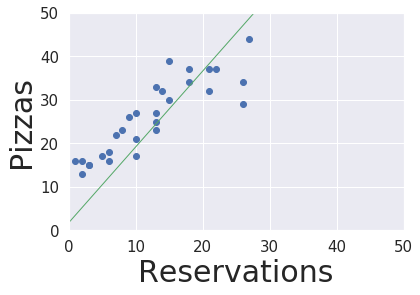

In [28]:
sns.set()
plt.plot(X, Y, "bo")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Reservations", fontsize=30)
plt.ylabel("Pizzas", fontsize=30)
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.show()